In [57]:
# !pip install EMD-signal
# !pip install ewtpyconda
# !pip install ewtpy
# !pip install pyts
# !pip install pyhht

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



file_path = 'Ahmedabad_Dengue.xlsx'
dengue_data = pd.read_excel(file_path)

dengue_data.head()


,Week,Cases,Rainfall
0,1,0,0.0
1,2,4,0.0
2,3,0,0.0
3,4,1,0.0
4,5,2,0.0


Analyzing time series data often involves understanding the underlying patterns such as trends, seasonal effects, and noise. Various methods have been developed to decompose and analyze these components, and you mentioned some of the most popular ones: STL, EWT, SSA, EMD, and HHT. Here's a basic explanation of each:

**1. STL (Seasonal and Trend decomposition using Loess):**
   - **Basic Concept**: STL decomposes a time series into three components: trend, seasonality, and remainder (residual).
   - **Trend**: A smooth, long-term progression of the series.
   - **Seasonality**: Patterns that repeat at regular intervals, e.g., daily, monthly, yearly.
   - **Residual**: The irregular component, or "noise," which is what remains after the trend and seasonal components are removed.
   - **Usage**: Often used in forecasting and analyzing seasonal patterns in the presence of a trend.

**2. EWT (Empirical Wavelet Transform):**
   - **Basic Concept**: EWT is a method for signal decomposition that adapts to the signal's characteristics. It identifies oscillatory modes within a signal by creating adaptive wavelets based on the signal's Fourier spectrum.
   - **Modes**: Components of the signal isolated between identified frequency bands.
   - **Usage**: Helps in understanding the local behavior of different frequency bands over time and is used in signal processing and time series analysis.

**3. SSA (Singular Spectral Analysis):**
   - **Basic Concept**: SSA combines elements of classical time series analysis, multivariate statistics, multivariate geometry, dynamical systems, and signal processing.
   - **Decomposition**: The time series is embedded into a high-dimensional space, and then a singular value decomposition (SVD) is applied to identify and reconstruct the signal's principal components.
   - **Usage**: Can be used to extract trends, oscillatory components, and noise; often used for smoothing, filling missing data, and forecasting.

**4. EMD (Empirical Mode Decomposition):**
   - **Basic Concept**: EMD decomposes a signal into a finite number of functions called Intrinsic Mode Functions (IMFs), which are obtained by an iterative process called sifting.
   - **IMFs**: Functions that are symmetric with respect to the local mean, have the same number of extrema and zero crossings, and have a zero mean.
   - **Usage**: Applied in various fields including signal processing, trend analysis, and data denoising.

**5. HHT (Hilbert-Huang Transform):**
   - **Basic Concept**: HHT is a combination of EMD and the Hilbert Spectral Analysis (HSA). After decomposing the signal with EMD, each IMF undergoes Hilbert transformation to calculate the instantaneous frequency and amplitude.
   - **Instantaneous Attributes**: Unlike classical Fourier transforms, HHT provides instantaneous frequency and amplitude, which is particularly useful for non-linear and non-stationary data.
   - **Usage**: It's widely used in the analysis of complex signals where the frequency content changes over time, such as geophysical or biomedical signals.

Each of these methods has its strengths and is selected based on the characteristics of the time series at hand and the goal of the analysis. For example, STL is excellent for detecting seasonality, while HHT is beneficial for signals whose frequency content changes over time. EWT and SSA can be particularly useful for separating out overlapped signals and identifying hidden periodicities, respectively.

Certainly, each of the time series analysis techniques you mentioned has its strengths and weaknesses. Here's a brief overview:

**1. STL (Seasonal and Trend decomposition using Loess):**
   - **Strengths**:
     - Flexibility: STL can handle any type of seasonality, not just a fixed seasonal effect.
     - Robustness: It is robust to outliers, as the Loess (locally estimated scatterplot smoothing) fitting is less sensitive to anomalies.
     - Versatility: The trend and seasonal components are allowed to change over time, making STL suitable for non-stationary time series.
   - **Weaknesses**:
     - Computational Intensity: Can be computationally expensive for large datasets due to the local fitting.
     - Lack of Model: It doesn't provide a model that can be easily extrapolated for forecasting beyond the dataset.

**2. EWT (Empirical Wavelet Transform):**
   - **Strengths**:
     - Adaptability: EWT automatically adapts to the signal by determining the number and location of frequency bands.
     - Localized Frequency Analysis: It allows for time-frequency analysis, which is useful for non-stationary signals.
   - **Weaknesses**:
     - Boundary Selection: The method for selecting frequency boundaries can be sensitive to noise and may require manual adjustment.
     - Limited Theoretical Framework: Being empirical, it might lack the theoretical rigor of other wavelet-based methods.

**3. SSA (Singular Spectral Analysis):**
   - **Strengths**:
     - No A Priori Model: SSA does not assume any prior model and is driven purely by the data.
     - Versatile Applications: It can be used for smoothing, decomposing, and forecasting time series.
   - **Weaknesses**:
     - Window Length Selection: Choosing an appropriate window length is crucial and not straightforward.
     - Interpretation: The resulting components may be difficult to interpret in terms of the original time series.

**4. EMD (Empirical Mode Decomposition):**
   - **Strengths**:
     - Intuitive: The components (IMFs) are direct decompositions of the signal and have a clear physical meaning.
     - Nonlinear and Non-stationary Data: EMD is designed to handle these types of data effectively.
   - **Weaknesses**:
     - Mode Mixing: EMD can suffer from mode mixing, where a single IMF may contain signals of widely varying scales.
     - End Effects: EMD can produce artifacts at the beginning and end of the signal.

**5. HHT (Hilbert-Huang Transform):**
   - **Strengths**:
     - Instantaneous Frequencies: Provides instantaneous frequency data, which is helpful for analyzing the local characteristics of the signal.
     - Applicability to Non-linear and Non-stationary Processes: HHT is effective in dealing with complex signals that other methods may not handle well.
   - **Weaknesses**:
     - EMD Dependency: The quality of HHT is heavily dependent on the quality of the IMFs produced by EMD.
     - Mathematical Rigor: HHT lacks a firm mathematical foundation compared to Fourier or wavelet transforms, potentially leading to skepticism in some scientific communities.

The choice of method often depends on the nature of the time series data and the specific research questions or business problems being addressed. The strengths and weaknesses of each technique highlight the importance of understanding the underlying assumptions and characteristics of these methods before applying them to a given dataset.

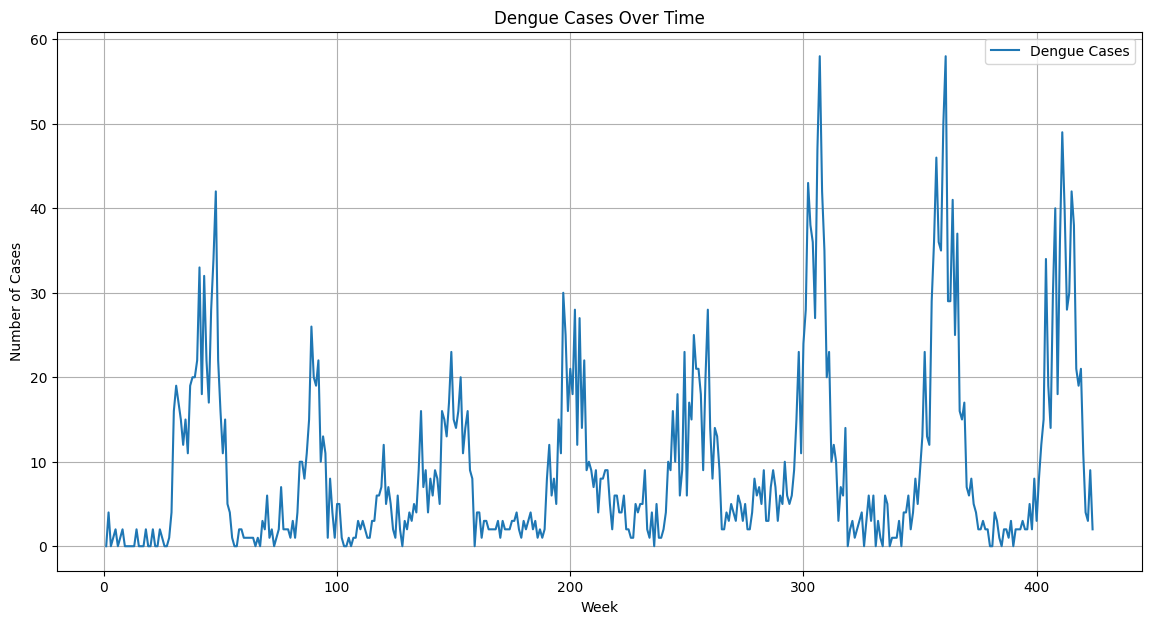

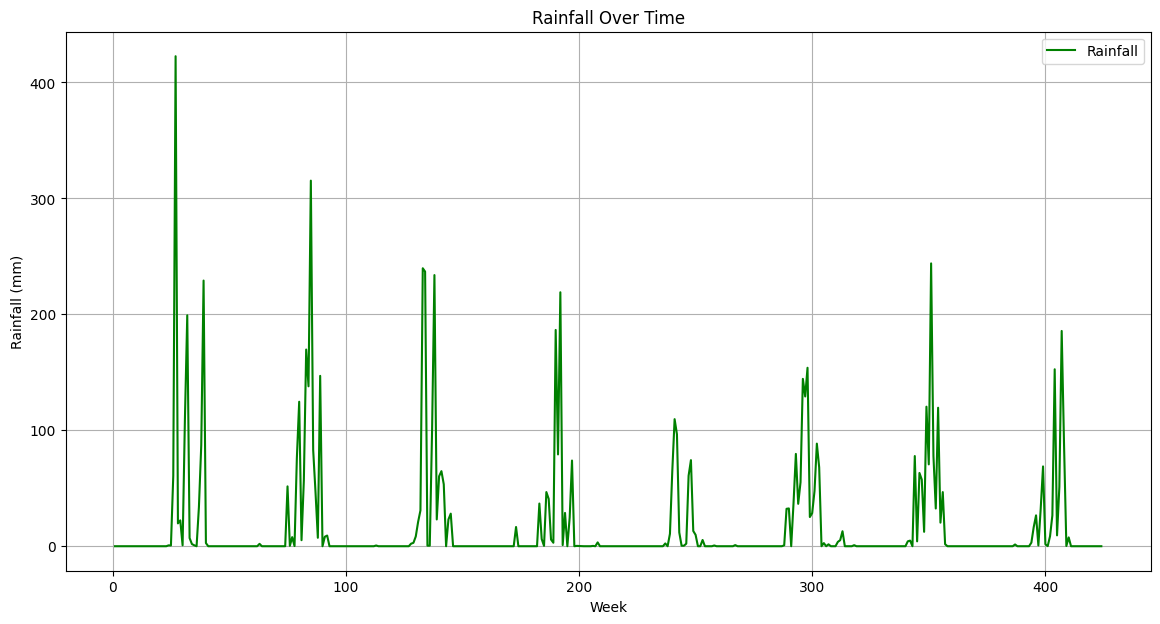

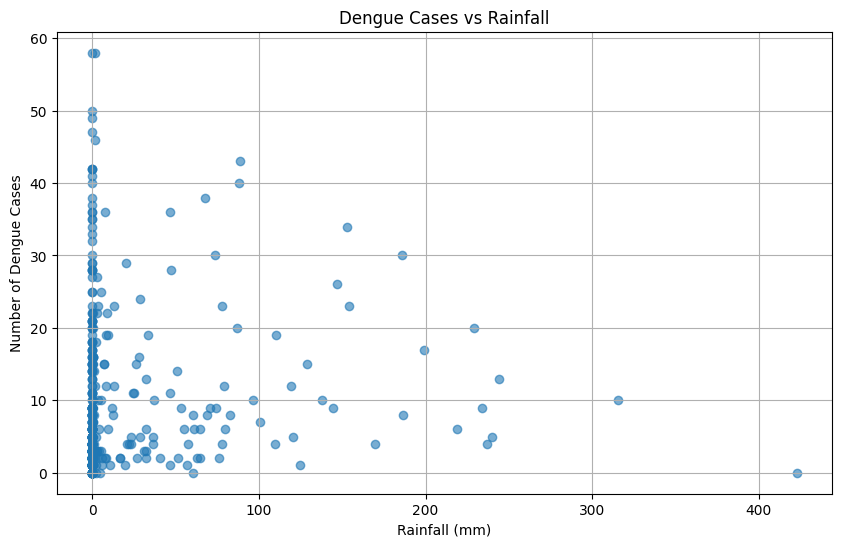

Text(0.5, 1.0, 'Correlation Matrix')

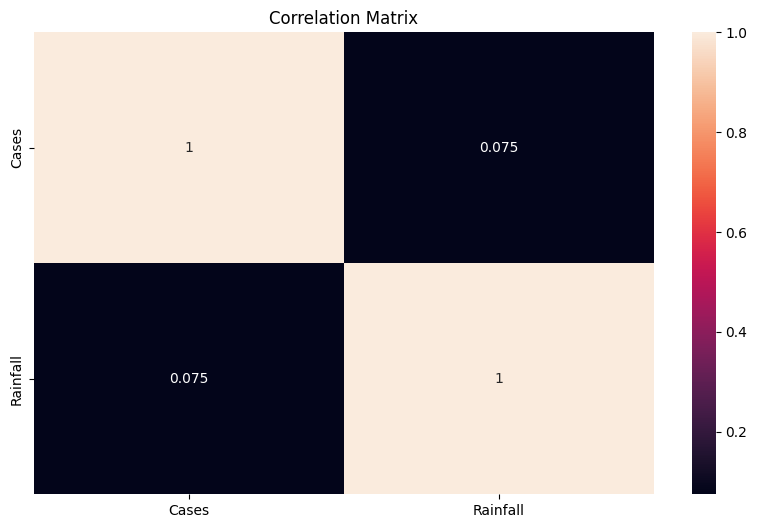

In [59]:
plt.figure(figsize=(14, 7))
plt.plot(dengue_data['Week'], dengue_data['Cases'], label='Dengue Cases')
plt.title('Dengue Cases Over Time')
plt.xlabel('Week')
plt.ylabel('Number of Cases')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
plt.plot(dengue_data['Week'], dengue_data['Rainfall'], label='Rainfall', color='green')
plt.title('Rainfall Over Time')
plt.xlabel('Week')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(dengue_data['Rainfall'], dengue_data['Cases'], alpha=0.6)
plt.title('Dengue Cases vs Rainfall')
plt.xlabel('Rainfall (mm)')
plt.ylabel('Number of Dengue Cases')
plt.grid(True)
plt.show()

correlation_matrix = dengue_data[['Cases', 'Rainfall']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')

1. **Dengue Cases Over Time**:
   The time series plot for dengue cases shows a clear seasonal pattern with peaks that might correspond to specific times of the year, which could be associated with environmental factors like temperature and rainfall that affect mosquito breeding patterns.

2. **Rainfall Over Time**:
   The rainfall time series also exhibits a seasonal pattern, with periods of high rainfall followed by periods of lower rainfall. This could correlate with the lifecycle of mosquitoes and hence with the spread of dengue fever.

3. **Dengue Cases vs Rainfall Scatter Plot**:
   The scatter plot does not depict a clear linear relationship between rainfall and dengue cases. Instead, it suggests a threshold effect where above a certain level of rainfall, the number of dengue cases increases, but additional rainfall does not correspond to a proportionate increase in cases. There are also many cases of dengue reported with low or zero rainfall, indicating that other factors besides rainfall are influencing dengue case numbers.

Here's an analysis based on these observations:

- The **seasonality in dengue cases** suggests that preventative measures could be timed ahead of expected peaks.
- The **lack of a strong linear relationship between rainfall and dengue cases** suggests that other factors, such as temperature, humidity, and human factors like urban density and water storage practices, might also play significant roles.
- The **peaks in dengue cases** following soon after peaks in rainfall could indicate the lag between mosquito breeding and the manifestation of the disease in the human population.

Next Steps in Analysis:

- Examine the lag between rainfall and peaks in dengue cases with cross-correlation analysis.
- Perform a multivariate analysis that includes other relevant variables such as temperature, humidity, and population movement data if available.
- Look into the data collection methods to understand any reporting biases that might affect the data (e.g., increased reporting during outbreaks or underreporting during off-peak times).

This visual analysis provides a foundation for more sophisticated statistical analysis, which could include time series forecasting models to predict future outbreaks, or logistic regression models to understand the probability of dengue occurrence given rainfall and other environmental variables.

# STL

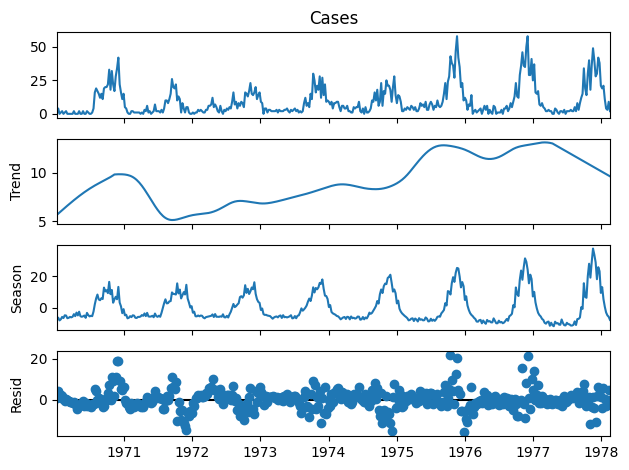

In [60]:
from statsmodels.tsa.seasonal import STL

cases_series = dengue_data.set_index(pd.to_datetime(dengue_data['Week'], unit='W'))['Cases']
stl = STL(cases_series, seasonal=13)
result = stl.fit()

result.plot()
plt.show()


# EMD

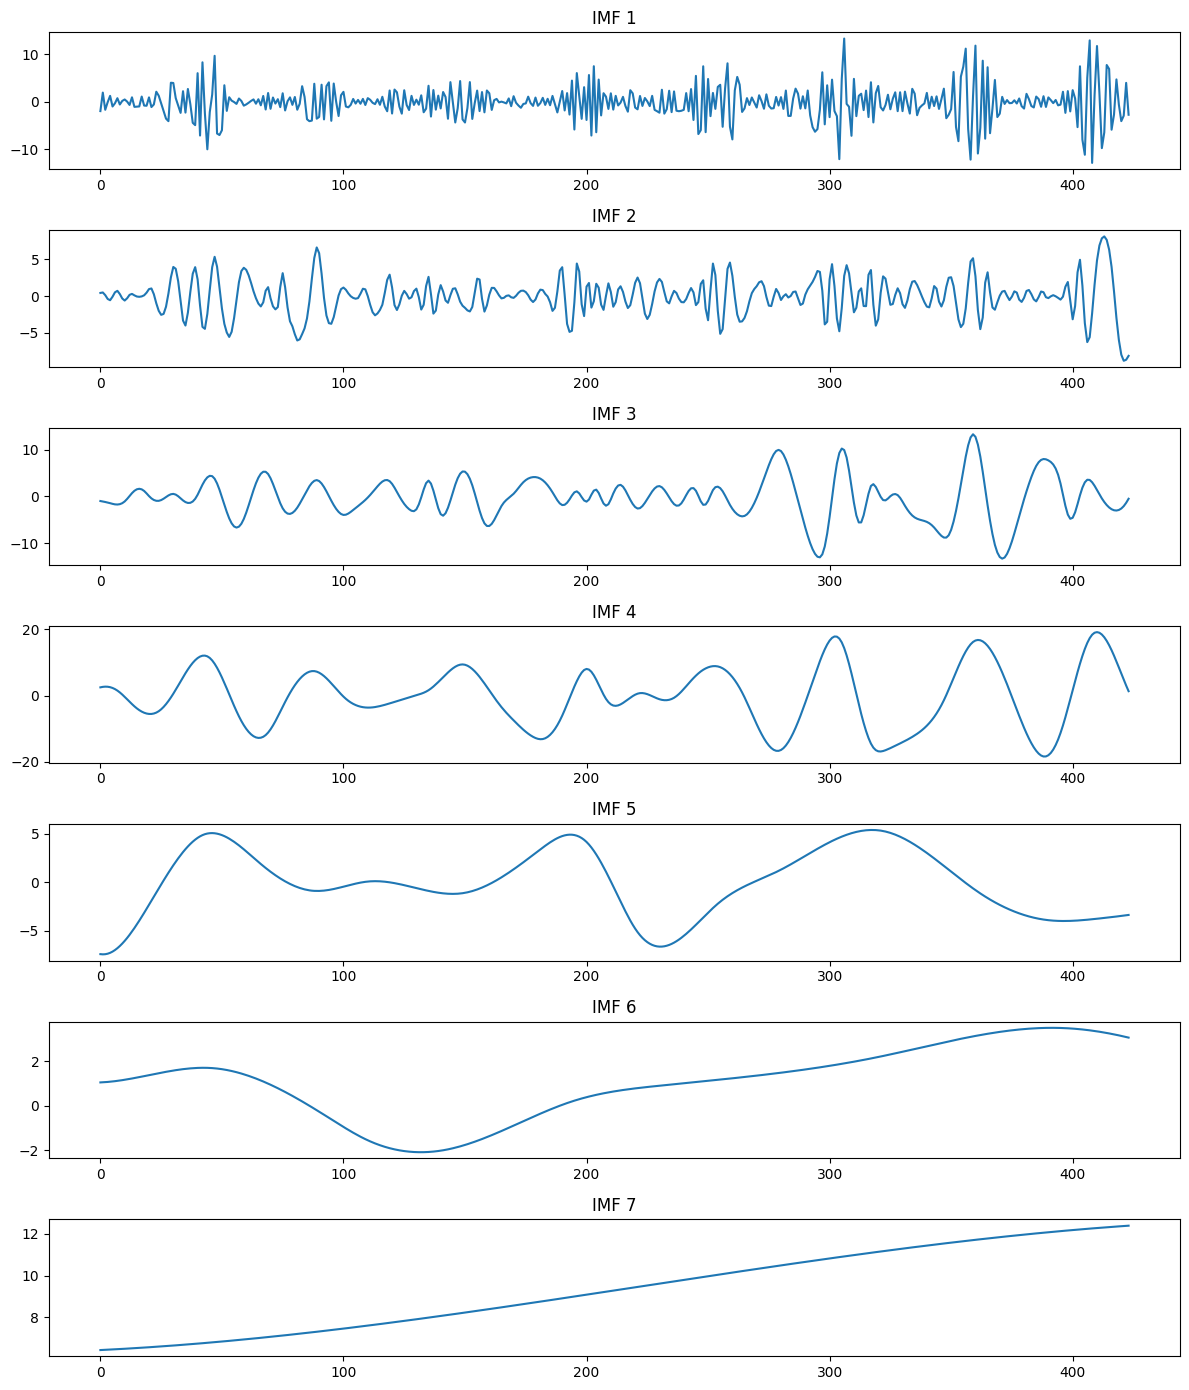

In [61]:
from PyEMD import EMD

emd = EMD()
IMFs = emd.emd(cases_series.values)
n_imfs = IMFs.shape[0]

plt.figure(figsize=(12, 2 * n_imfs))
for i, imf in enumerate(IMFs):
    plt.subplot(n_imfs, 1, i + 1)
    plt.plot(imf)
    plt.title(f'IMF {i+1}')
plt.tight_layout()
plt.show()


Writing a full Empirical Mode Decomposition (EMD) function from scratch is a complex task that goes beyond the scope of this platform, as it involves sophisticated signal processing techniques. However, I can provide a simplified version of the EMD algorithm that you can use as a starting point. This version will lack the nuances and optimizations of a full implementation but will follow the general idea of the algorithm:

- Identify all local extrema.
- Interpolate between local maxima to create an upper envelope.
- Interpolate between local minima to create a lower envelope.
- Calculate the mean of the upper and lower envelopes.
- Subtract the mean from the original data to produce the first component.
- Iterate on the residue.

Here is a basic structure of EMD in Python. Note that this implementation does not handle various edge cases and should not be used for scientific computation without further development and testing.

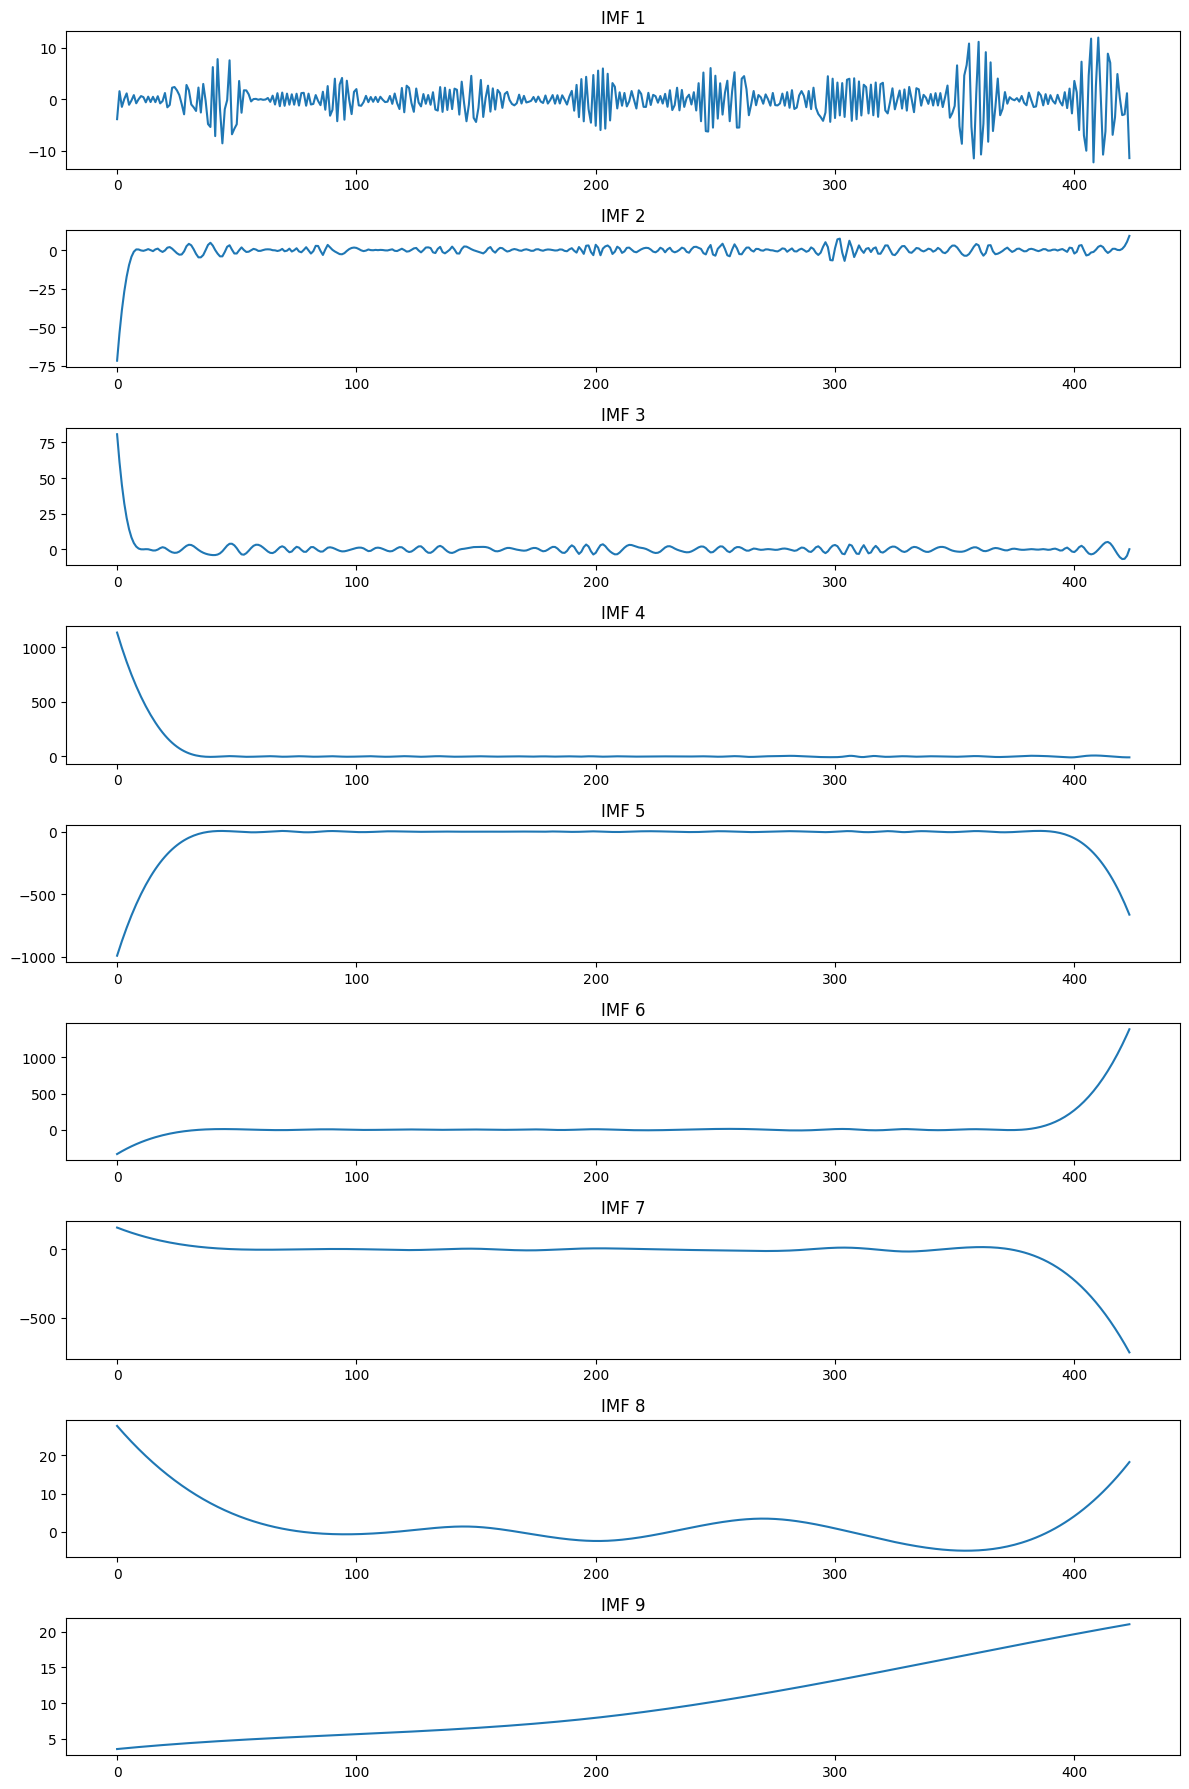

In [62]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

def emd(signal, max_imfs=10):
    imfs = []
    # Ensure that residue is of float type
    residue = np.array(signal, dtype=float)
    n = len(signal)

    def is_imf(x):
        n_extrema = np.sum((np.diff(np.sign(np.diff(x))) != 0))
        n_zero_crossings = np.sum(np.diff(np.sign(x)) != 0)
        return np.abs(n_extrema - n_zero_crossings) <= 1
    
    for _ in range(max_imfs):
        h = residue.copy()
        sd = np.inf
        while sd > 0.1 or not is_imf(h):
            # Identify maxima and minima
            max_peaks = np.array([i for i in range(1, n - 1) if h[i] > h[i - 1] and h[i] > h[i + 1]])
            min_peaks = np.array([i for i in range(1, n - 1) if h[i] < h[i - 1] and h[i] < h[i + 1]])
            
            # Interpolate maxima and minima
            if len(max_peaks) < 2 or len(min_peaks) < 2:
                imfs.append(residue)
                return imfs
            max_env = CubicSpline(max_peaks, h[max_peaks], bc_type='natural')(np.arange(n))
            min_env = CubicSpline(min_peaks, h[min_peaks], bc_type='natural')(np.arange(n))
            
            # Mean of envelopes and new component (h)
            mean_env = (max_env + min_env) / 2
            prev_h = h.copy()
            h = h - mean_env
            
            # Calculate standard deviation as a stopping criterion
            # Avoid division by zero by adding a small constant (epsilon)
            epsilon = 1e-10
            sd = np.sum(((prev_h - h) ** 2) / (prev_h ** 2 + epsilon))
        
        imfs.append(h)
        residue -= h
    
    return imfs

# Replace 'dengue_data' with the actual variable containing your data
# Perform EMD on the signal
cases_series = np.array(dengue_data['Cases'], dtype=float)
IMFs = emd(cases_series)
n_imfs = len(IMFs)

# Plotting the IMFs
plt.figure(figsize=(12, 2 * n_imfs))
for i, imf in enumerate(IMFs):
    plt.subplot(n_imfs, 1, i + 1)
    plt.plot(imf)
    plt.title(f'IMF {i+1}')
plt.tight_layout()
plt.show()


# HHT

In [63]:
from scipy.signal import hilbert
from pyhht.emd import EMD

# Assuming 'signal' is a 1D NumPy array containing your time series data
signal = cases_series.values

# Perform Empirical Mode Decomposition (EMD) to extract IMFs
emd = EMD()
imfs = emd(signal)

# Initialize a plot
plt.figure(figsize=(12, 9))

sampling_rate = 1/7

# Apply Hilbert Transform to each IMF to get the instantaneous frequency
for i, imf in enumerate(imfs):
    # Apply Hilbert Transform
    analytic_signal = hilbert(imf)
    amplitude_envelope = np.abs(analytic_signal)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency = np.diff(instantaneous_phase) / (2.0 * np.pi) * sampling_rate

    # Plotting the IMF
    plt.subplot(len(imfs), 1, i+1)
    plt.plot(cases_series.index, imf, 'g')
    plt.plot(cases_series.index, amplitude_envelope, 'r')
    plt.title(f'IMF {i+1} and its amplitude envelope')
    plt.xlabel('Time')
    plt.ylabel('Amplitude/Frequency')

plt.tight_layout()
plt.show()


ImportError: cannot import name 'angle' from 'scipy' (/home/ameychoudhary4/.local/lib/python3.10/site-packages/scipy/__init__.py)

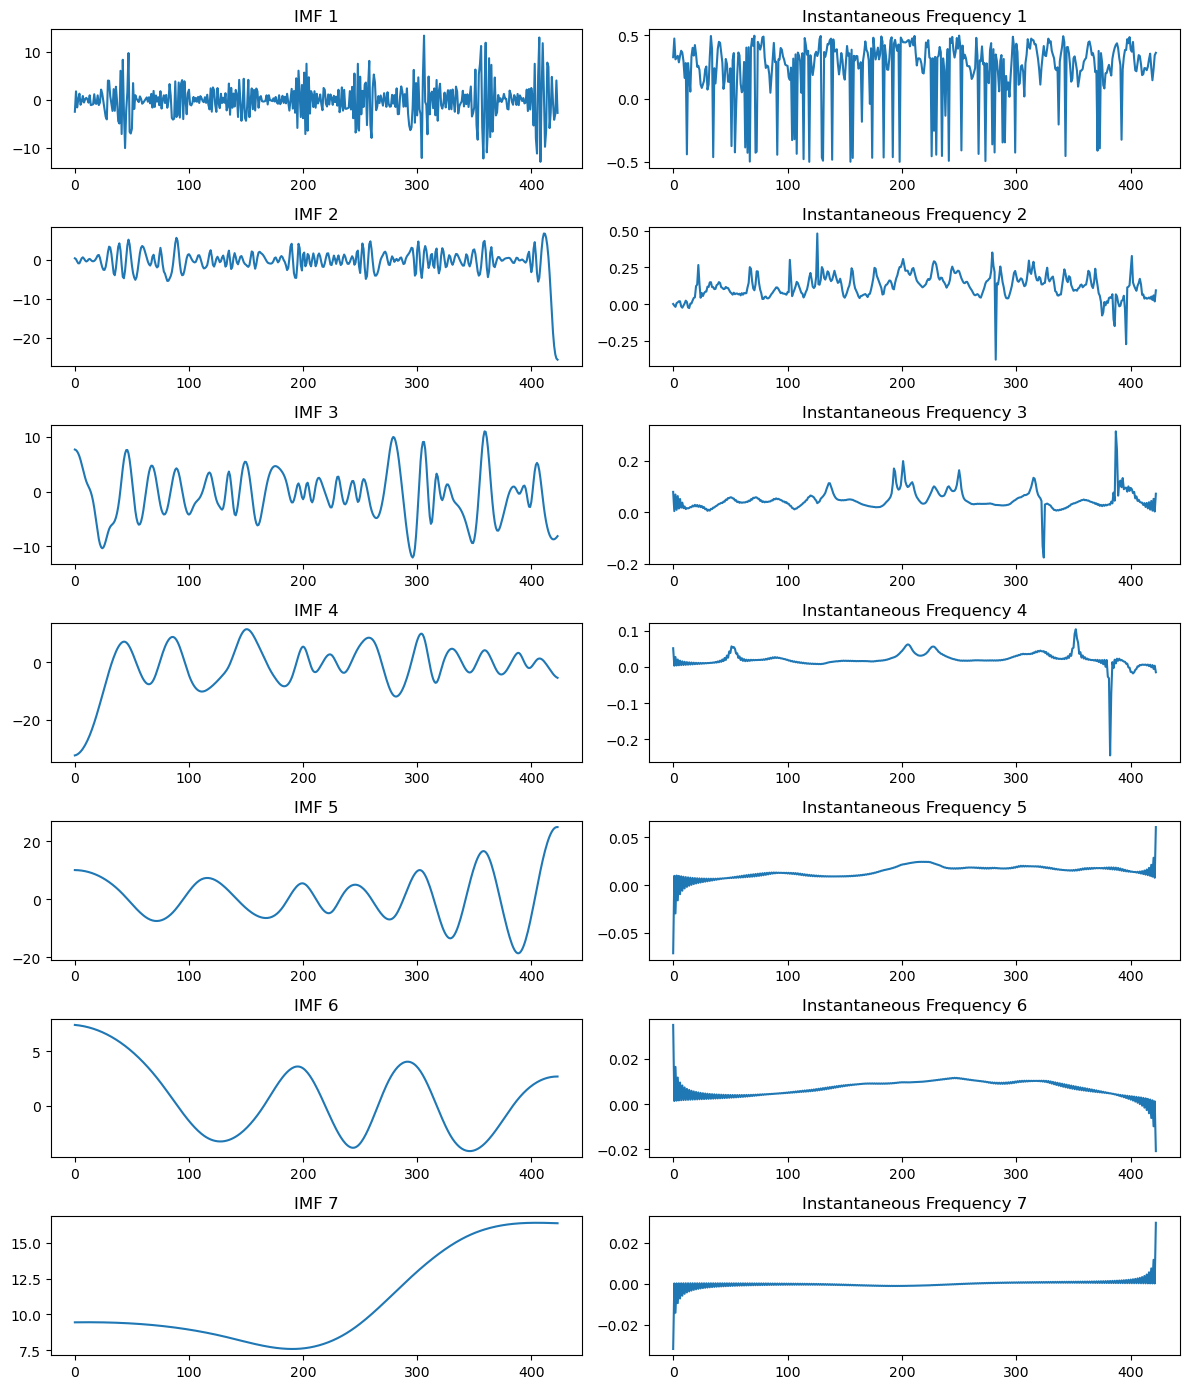

In [ ]:
from pyhht.emd import EMD
from scipy.signal import hilbert


# Select the 'Cases' column for HHT
cases_series = dengue_data['Cases'].values

# Perform EMD on the signal to decompose it into Intrinsic Mode Functions (IMFs)
emd = EMD(cases_series)
imfs = emd.decompose()

# Apply Hilbert transform to each IMF to obtain the analytical signal
instantaneous_frequency = []
for imf in imfs:
    analytic_signal = hilbert(imf)
    instantaneous_phase = np.unwrap(np.angle(analytic_signal))
    instantaneous_frequency.append(np.diff(instantaneous_phase) / (2.0 * np.pi))

# Plot the IMFs and their instantaneous frequency
num_imfs = len(imfs)
plt.figure(figsize=(12, num_imfs*2))
for i, (imf, freq) in enumerate(zip(imfs, instantaneous_frequency)):
    plt.subplot(num_imfs, 2, 2*i + 1)
    plt.plot(imf)
    plt.title('IMF {}'.format(i + 1))
    plt.subplot(num_imfs, 2, 2*i + 2)
    plt.plot(freq)
    plt.title('Instantaneous Frequency {}'.format(i + 1))
plt.tight_layout()
plt.show()


# EWT

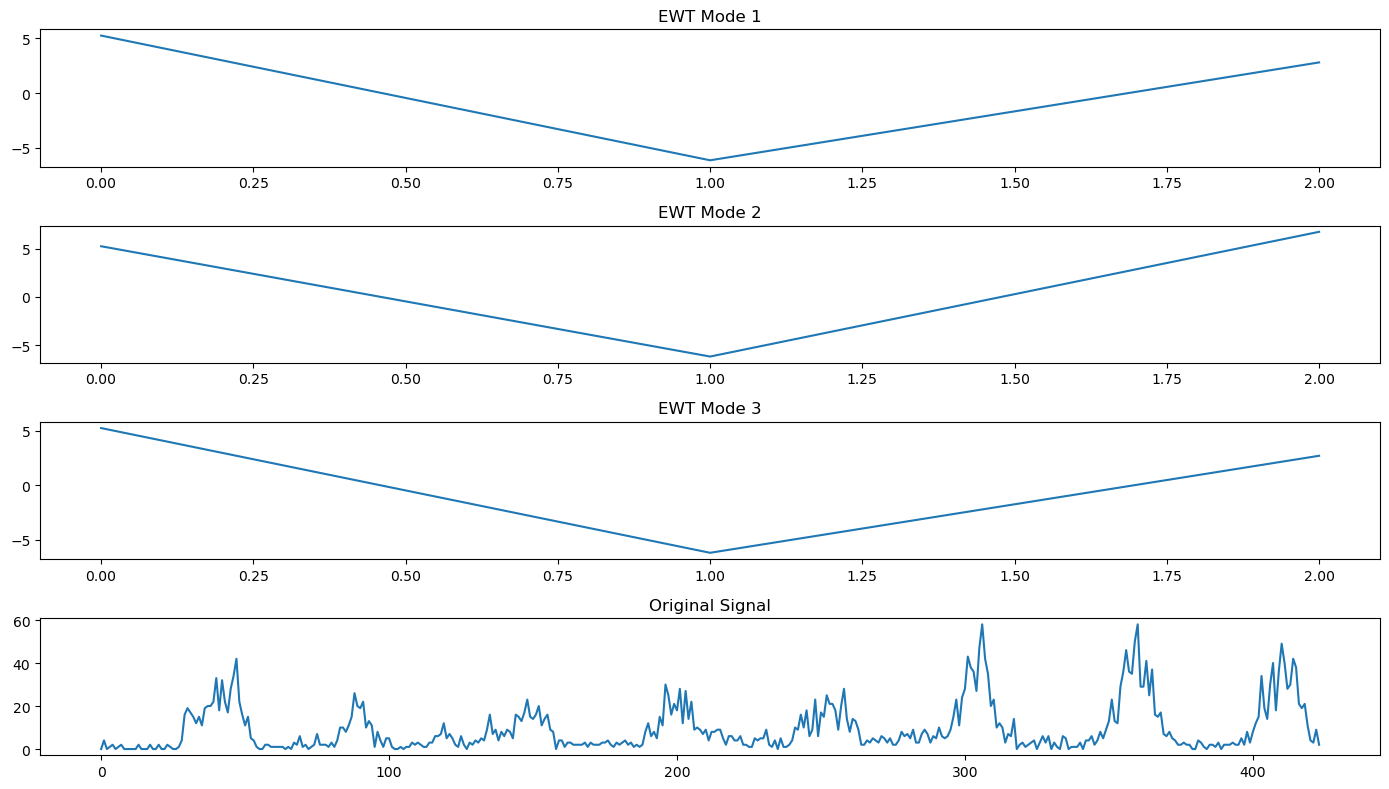

In [ ]:
import ewtpy

# Select the 'Cases' column for EWT
cases_series = dengue_data['Cases'].values

# Perform the Empirical Wavelet Transform (EWT)
ewt, mfb, boundaries = ewtpy.EWT1D(cases_series, N=3)

# Plotting the original signal and the modes
plt.figure(figsize=(14, 8))
for i in range(3):
    plt.subplot(4, 1, i+1)
    plt.plot(ewt[i])
    plt.title(f'EWT Mode {i+1}')
plt.subplot(4, 1, 4)
plt.plot(cases_series)
plt.title('Original Signal')
plt.tight_layout()
plt.show()


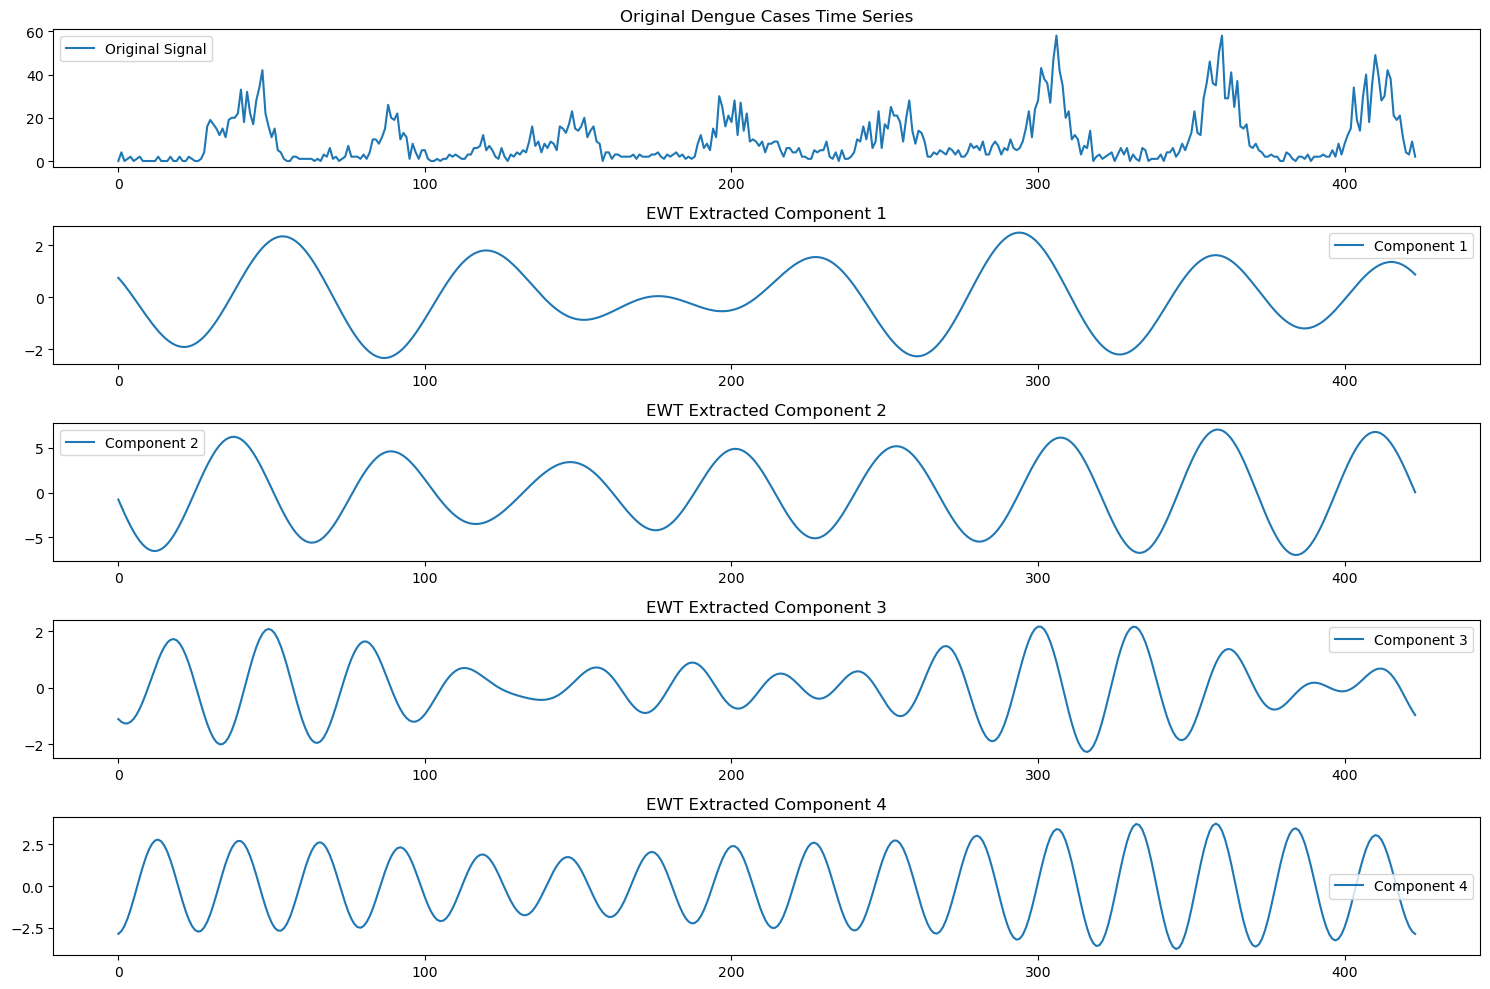

In [ ]:
# Unfortunately, we don't have the capability to install the 'ewtpy' library in this environment.
# However, I can demonstrate how you could implement a basic version of EWT
# using NumPy for the Fourier transform and signal processing.


# Assuming 'cases_series' is a numpy array with the dengue cases
# Let's simulate the cases_series since we cannot run the actual 'ewtpy' library
cases_series = dengue_data['Cases'].to_numpy()

# Define a function to find the local maxima, which will be used to determine the frequency bands
def find_local_maxima(arr):
    """Find local maxima in an array."""
    local_maxima = (np.diff(np.sign(np.diff(arr))) < 0).nonzero()[0] + 1  # local max + 1
    return local_maxima

# Compute the Fourier transform of the signal
signal_fft = np.fft.fft(cases_series)

# Find the local maxima in the Fourier spectrum which could be the boundaries for EWT
frequency_bins = np.fft.fftfreq(cases_series.size)
magnitude_spectrum = np.abs(signal_fft)
local_maxima = find_local_maxima(magnitude_spectrum)

# For simplicity, let's take the first 5 local maxima as our boundaries
num_boundaries = 5
boundaries = sorted(local_maxima[:num_boundaries])

# Now we would design bandpass filters using these boundaries
# This is a simplified placeholder for actual filter design
filters = []
for i in range(len(boundaries) - 1):
    filter_ = np.zeros_like(cases_series, dtype=float)
    filter_[boundaries[i]:boundaries[i+1]] = 1
    filters.append(filter_)

# Apply the filters to extract the EWT components
ewt_components = []
for filter_ in filters:
    filtered_signal_fft = signal_fft * filter_
    filtered_signal = np.fft.ifft(filtered_signal_fft)
    ewt_components.append(filtered_signal)

# The ewt_components list now contains the sub-signals obtained from the original signal
# Note: This is an illustrative example and not a true EWT implementation

# Plot the original signal and the extracted components
plt.figure(figsize=(15, 10))
plt.subplot(len(ewt_components) + 1, 1, 1)
plt.plot(cases_series, label='Original Signal')
plt.legend()
plt.title('Original Dengue Cases Time Series')

for i, component in enumerate(ewt_components):
    plt.subplot(len(ewt_components) + 1, 1, i + 2)
    plt.plot(np.real(component), label=f'Component {i+1}')
    plt.legend()
    plt.title(f'EWT Extracted Component {i+1}')

plt.tight_layout()
plt.show()


# SSA

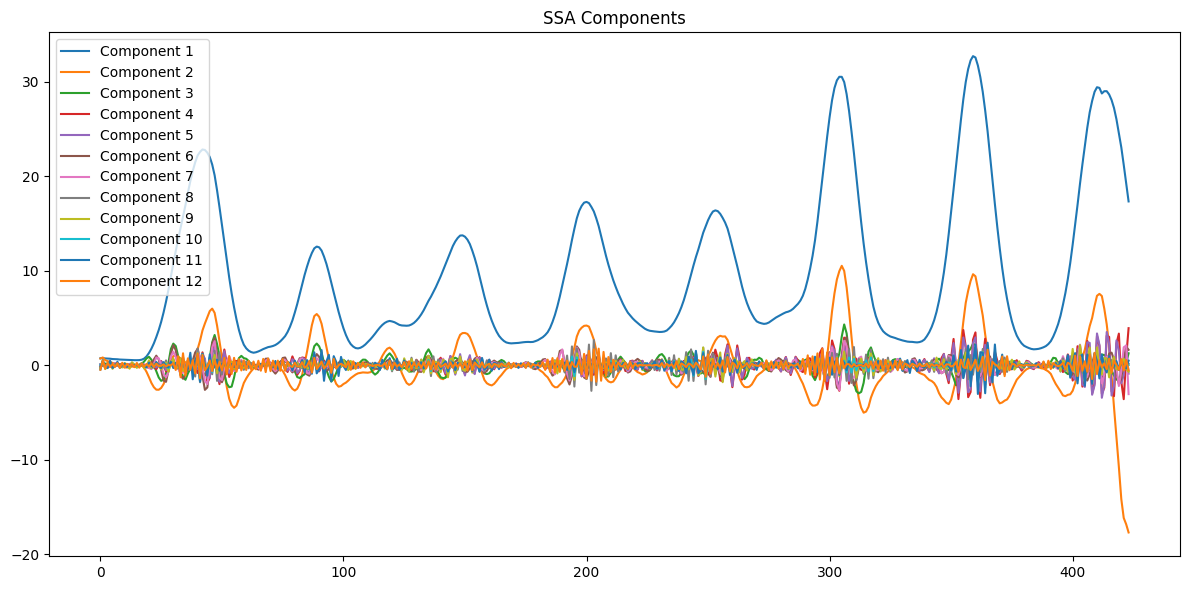

In [64]:
from pyts.decomposition import SingularSpectrumAnalysis

# Load the dataset

# Select the 'Cases' column for SSA
cases_series = dengue_data['Cases']

# Initialize SSA with a window size
# The window size should be chosen based on the expected periodicity of the data
# For example, a window size of 12 might be chosen for monthly data with annual periodicity
window_size = 12  # adjust this based on your data
ssa = SingularSpectrumAnalysis(window_size=window_size)

# Fit and transform the data using SSA
X_ssa = ssa.fit_transform(cases_series.values.reshape(1, -1))

# X_ssa is a 3D array of shape (1, window_size, n_samples), where
# n_samples is the number of samples in the 'Cases' column.
# We need to reshape it to a 2D array to plot the components.
X_ssa = X_ssa.reshape(window_size, -1)

# Plotting the reconstructed time series using the first few SSA components
plt.figure(figsize=(12, 6))
for i in range(window_size):
    plt.plot(X_ssa[i], label=f'Component {i+1}')
plt.title('SSA Components')
plt.legend()
plt.tight_layout()
plt.show()


Epoch [1000/25000], Loss: 21.7814
Epoch [2000/25000], Loss: 6.3065
Epoch [3000/25000], Loss: 2.4097
Epoch [4000/25000], Loss: 1.1617
Epoch [5000/25000], Loss: 0.6040
Epoch [6000/25000], Loss: 0.2661
Epoch [7000/25000], Loss: 0.1078
Epoch [8000/25000], Loss: 0.0552
Epoch [9000/25000], Loss: 0.0259
Epoch [10000/25000], Loss: 0.0152
Epoch [11000/25000], Loss: 0.0100
Epoch [12000/25000], Loss: 0.0075
Epoch [13000/25000], Loss: 0.0065
Epoch [14000/25000], Loss: 0.0058
Epoch [15000/25000], Loss: 0.0054
Epoch [16000/25000], Loss: 0.0050
Epoch [17000/25000], Loss: 0.0047
Epoch [18000/25000], Loss: 0.0045
Epoch [19000/25000], Loss: 0.0044
Epoch [20000/25000], Loss: 0.0042
Epoch [21000/25000], Loss: 0.0041
Epoch [22000/25000], Loss: 0.0040
Epoch [23000/25000], Loss: 0.0039
Epoch [24000/25000], Loss: 0.0039
Epoch [25000/25000], Loss: 0.0038
Epoch [1000/25000], Loss: 0.2706
Epoch [2000/25000], Loss: 0.1022
Epoch [3000/25000], Loss: 0.0393
Epoch [4000/25000], Loss: 0.0274
Epoch [5000/25000], Loss: 

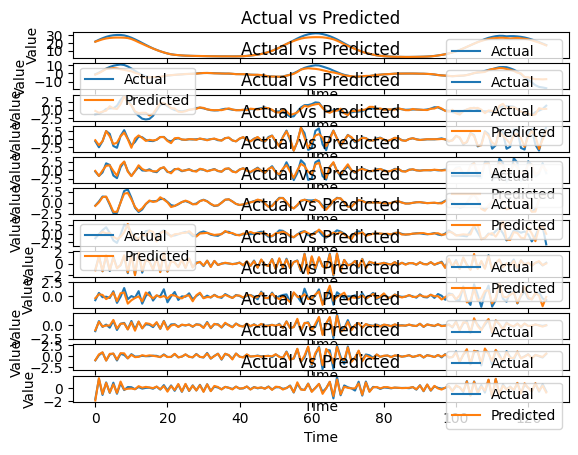

In [67]:
# import torch
# import torch.nn as nn
# import torch.optim as optim
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate sample data
# np.random.seed(0)
# # data = np.random.rand(424)  # Sample time series data

# for i in range(len(X_ssa)):
#     data = X_ssa[i]

#     # Define function to create lagged sequences
#     def create_lagged_sequence(data, lag):
#         X, y = [], []
#         for i in range(len(data)-lag):
#             X.append(data[i:(i+lag)])
#             y.append(data[i+lag])
#         return np.array(X), np.array(y)

#     # Create lagged sequences
#     lag = 5
#     X, y = create_lagged_sequence(data, lag)

#     # Split data into train and test sets
#     split_idx = int(0.7 * len(X))
#     X_train, y_train = X[:split_idx], y[:split_idx]
#     X_test, y_test = X[split_idx:], y[split_idx:]

#     # Convert data to PyTorch tensors
#     X_train = torch.Tensor(X_train)
#     y_train = torch.Tensor(y_train)
#     X_test = torch.Tensor(X_test)
#     y_test = torch.Tensor(y_test)

#     # Define neural network
#     class Net(nn.Module):
#         def __init__(self):
#             super(Net, self).__init__()
#             self.fc1 = nn.Linear(lag, 10)  # Increase number of hidden units
#             self.fc2 = nn.Linear(10, 1)
#             self.sigmoid = nn.Sigmoid()

#         def forward(self, x):
#             x = self.fc1(x)
#             x = self.sigmoid(x)
#             x = self.fc2(x)
#             return x

#     # Initialize the network
#     net = Net()

#     # Define loss function and optimizer
#     criterion = nn.MSELoss()
#     optimizer = optim.Adam(net.parameters(), lr=0.001)  # Use Adam optimizer with a smaller learning rate

#     # Train the network
#     epochs = 25000
#     losses = []  # to store losses for visualization
#     for epoch in range(epochs):
#         optimizer.zero_grad()
#         outputs = net(X_train)
#         loss = criterion(outputs, y_train.view(-1, 1))
#         loss.backward()
#         optimizer.step()
#         losses.append(loss.item())
#         if (epoch+1) % 1000 == 0:
#             print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

#     # # Plot the training loss
#     # plt.plot(losses)
#     # plt.xlabel('Epoch')
#     # plt.ylabel('Loss')
#     # plt.title('Training Loss')
#     # plt.show()

#     # Evaluate the trained network
#     net.eval()
#     predicted = net(X_test).detach().numpy()

#     # Plot actual vs predicted values
#     plt.subplot(len(X_ssa), 1, i+1)
#     plt.plot(y_test, label='Actual')
#     plt.plot(predicted, label='Predicted')
#     plt.xlabel('Time')
#     plt.ylabel('Value')
#     plt.title('Actual vs Predicted')
#     plt.legend()
# plt.show()


# MODWT

In [ ]:
# !pip install PyWavelets

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 1.1 MB/s eta 0:00:0000:0100:010m


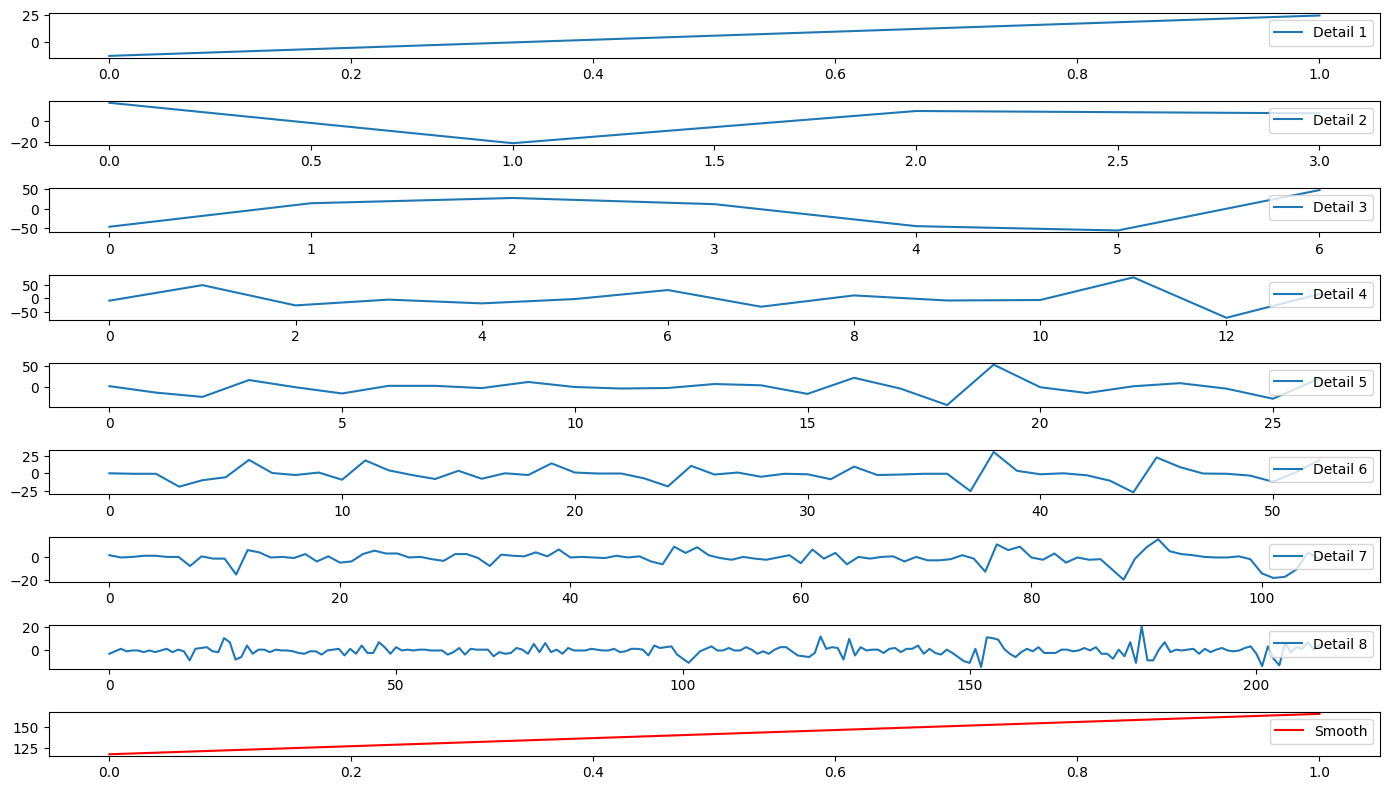

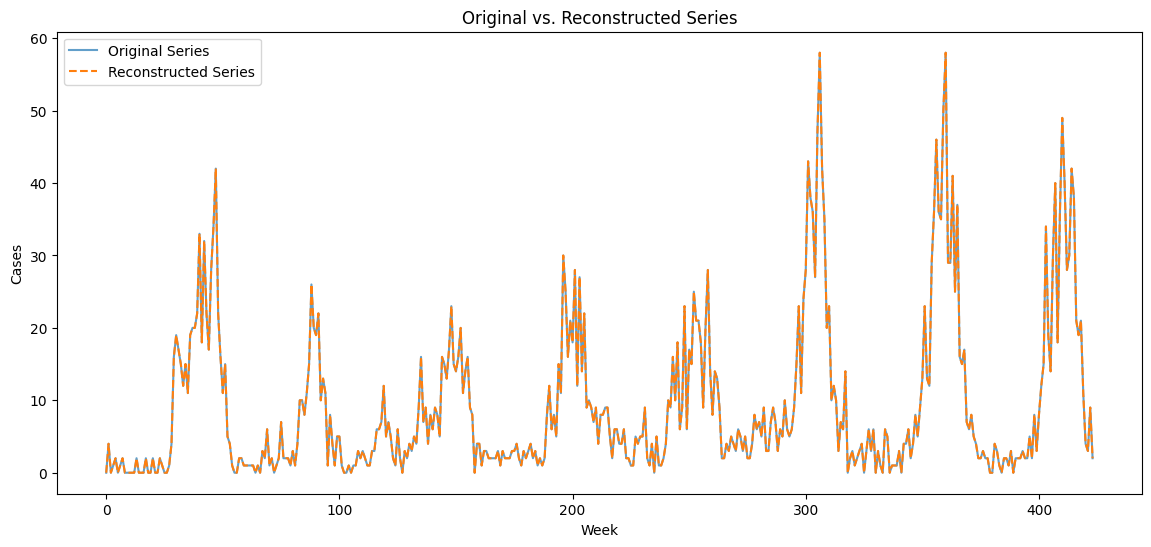

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Select the "Cases" column for MODWT
cases_series = dengue_data['Cases']

# Perform MODWT on the "Cases" column
wavelet = 'db1'
mode = 'periodic'
max_level = pywt.dwt_max_level(data_len=len(cases_series), filter_len=pywt.Wavelet(wavelet).dec_len)
coeffs = pywt.wavedec(data=cases_series, wavelet=wavelet, level=max_level, mode=mode)

# Plot the detail curves and the smooth curve
plt.figure(figsize=(14, 8))

# Plotting each detail component
for i in range(1, len(coeffs)):
    plt.subplot(len(coeffs), 1, i)
    plt.plot(coeffs[i], label=f'Detail {i}')
    plt.legend(loc='upper right')

# Plotting the smooth (approximation) component
plt.subplot(len(coeffs), 1, len(coeffs))
plt.plot(coeffs[0], label='Smooth', color='red')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()



# Recombine the detail and smooth components to reconstruct the original series
reconstructed_series = pywt.waverec(coeffs, wavelet=wavelet, mode=mode)

# Plot the original and reconstructed series for comparison
plt.figure(figsize=(14, 6))
plt.plot(cases_series, label='Original Series', alpha=0.7)
plt.plot(reconstructed_series, label='Reconstructed Series', linestyle='--')
plt.legend()
plt.title('Original vs. Reconstructed Series')
plt.xlabel('Week')
plt.ylabel('Cases')
plt.show()



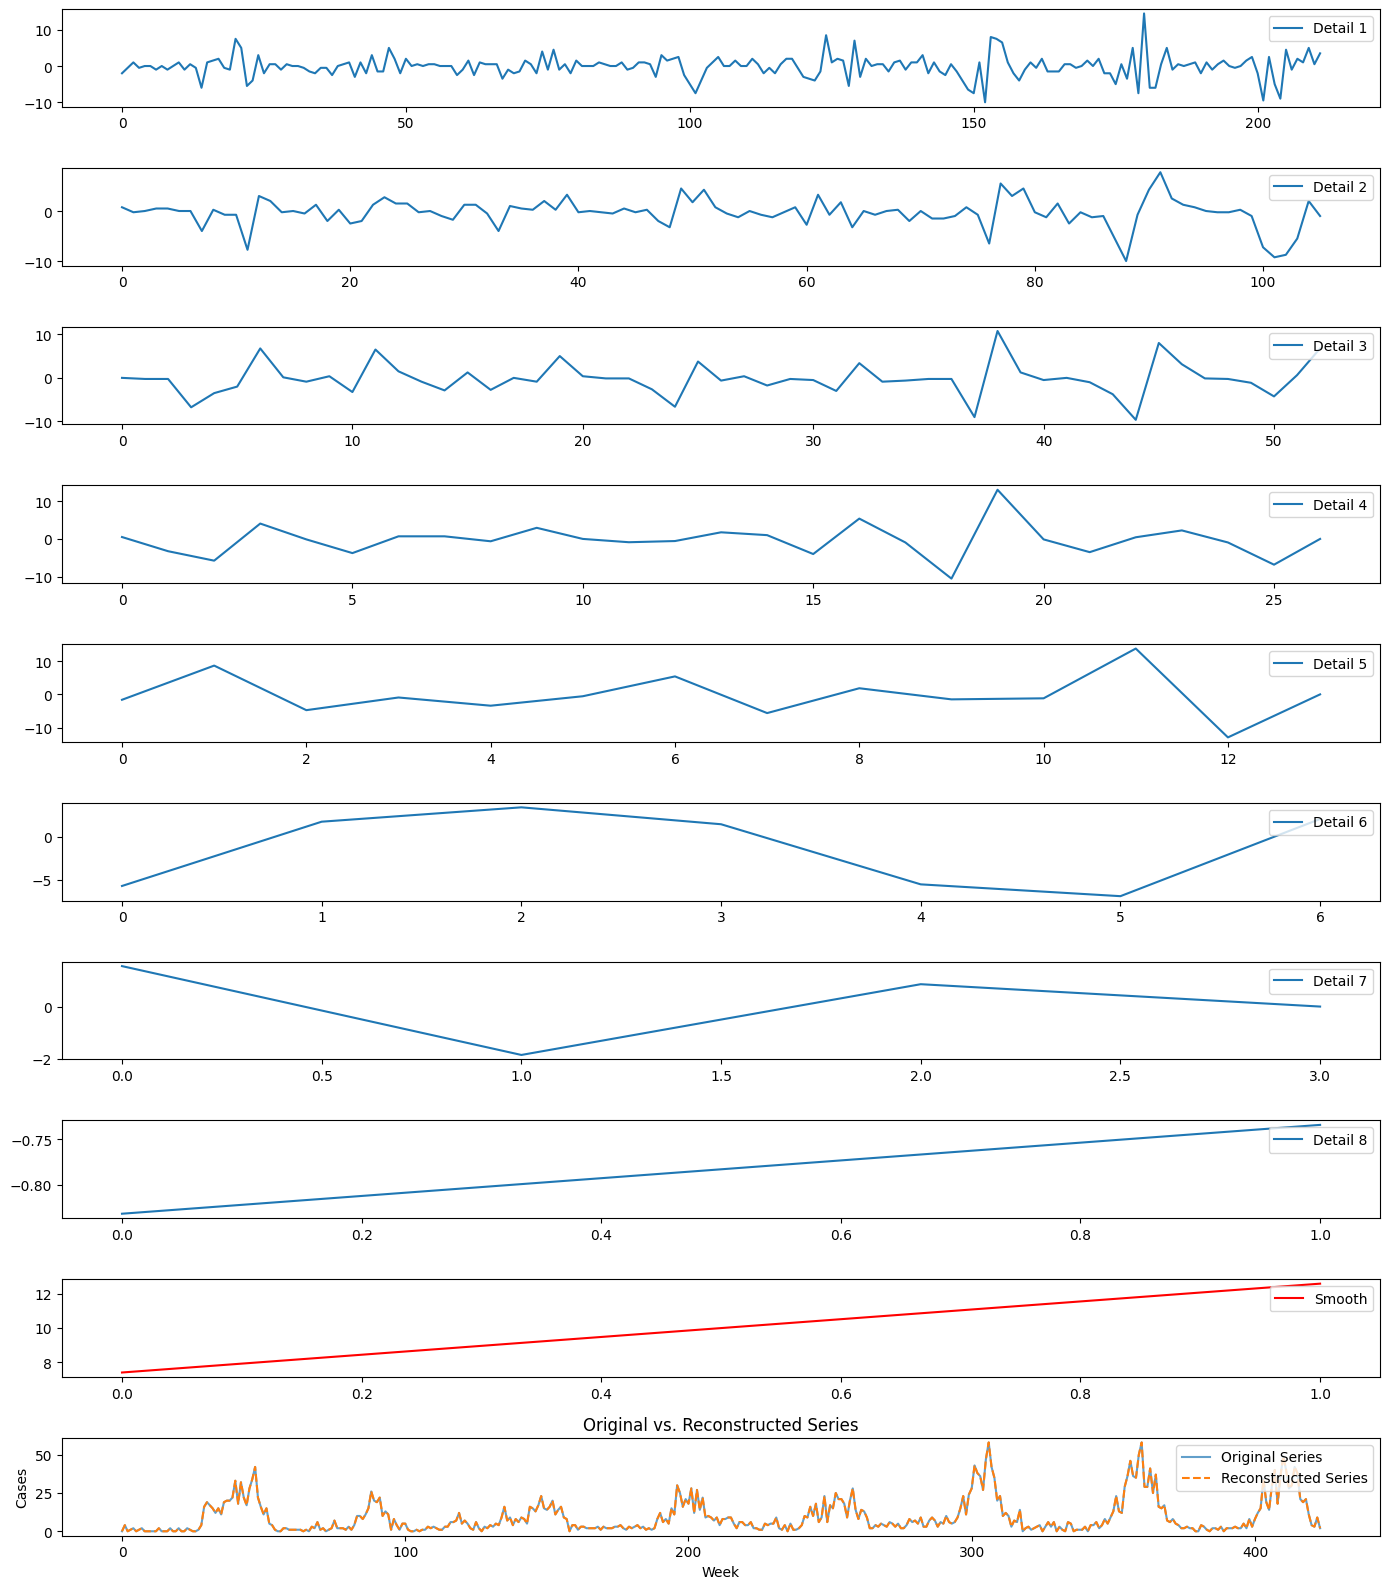

In [ ]:
def haar_wavelet_transform(data):
    """
    Performs a single-level Haar wavelet transform.
    """
    approximation = []
    detail = []
    for i in range(0, len(data), 2):
        if i+1 < len(data):
            approx = (data[i] + data[i+1]) / 2
            det = (data[i] - data[i+1]) / 2
        else:
            # Handling the case where the series length is odd
            approx = data[i]
            det = 0
        approximation.append(approx)
        detail.append(det)
    return approximation, detail

def modwt_haar(data, levels):
    """
    Performs a multi-level MODWT using Haar wavelets.
    """
    details = []
    approximation = data
    for level in range(levels):
        approximation, detail = haar_wavelet_transform(approximation)
        details.append(detail)
    return approximation, details

# Determine the number of levels for decomposition
levels = 8  # We'll use 8 levels as requested

# Perform MODWT
approximation, details = modwt_haar(cases_series, levels)

# Plotting
fig, axs = plt.subplots(levels + 2, 1, figsize=(14, 16))

# Plot each detail component
for i in range(levels):
    axs[i].plot(details[i], label=f'Detail {i+1}')
    axs[i].legend(loc='upper right')

# Plot the smooth (approximation) component
axs[levels].plot(approximation, label='Smooth', color='red')
axs[levels].legend(loc='upper right')

# Function to reconstruct the original series from the MODWT components
def modwt_reconstruct(approximation, details):
    """
    Reconstructs the original series from MODWT components.
    """
    reconstructed = approximation
    for detail in reversed(details):
        temp = []
        for i in range(len(detail)):
            approx = reconstructed[i]
            det = detail[i]
            temp.append(approx + det)
            temp.append(approx - det)
        reconstructed = temp[:len(cases_series)]  # Adjust in case of odd length
    return reconstructed

# Reconstruct the original series
reconstructed_series = modwt_reconstruct(approximation, details)

# Plot the original and reconstructed series
axs[levels + 1].plot(cases_series, label='Original Series', alpha=0.7)
axs[levels + 1].plot(reconstructed_series, label='Reconstructed Series', linestyle='--')
axs[levels + 1].legend(loc='upper right')
axs[levels + 1].set_title('Original vs. Reconstructed Series')
axs[levels + 1].set_xlabel('Week')
axs[levels + 1].set_ylabel('Cases')

plt.tight_layout()
plt.show()


### 1. Haar Wavelet Transform Function (`haar_wavelet_transform`)
- **Purpose**: This function performs a single level of Haar wavelet decomposition on a given dataset.
- **Mathematical Steps**:
  - The input data series is processed in pairs.
  - For each pair of data points `(data[i], data[i+1])`, it computes the `approximation` (average) and `detail` (difference) coefficients.
    - `approximation = (data[i] + data[i+1]) / 2`
    - `detail = (data[i] - data[i+1]) / 2`
  - If the series has an odd length, the last point is handled specially, often by setting the detail to 0 and keeping the approximation as the value of the last point.
  - This results in two new series: one of approximation coefficients and one of detail coefficients.

### 2. MODWT using Haar (`modwt_haar`)
- **Purpose**: To perform multi-level decomposition using Haar wavelets on the time series data.
- **Mathematical Steps**:
  - Starting with the original data series, it repeatedly applies the `haar_wavelet_transform` function.
  - In each iteration (level), it decomposes the `approximation` coefficients from the previous level into a new set of `approximation` and `detail` coefficients.
  - This process is repeated for a specified number of levels, generating multiple sets of detail coefficients (one for each level) and a final set of approximation coefficients.

### 3. Reconstruction Function (`modwt_reconstruct`)
- **Purpose**: To reconstruct the original time series from the multi-level wavelet decomposition.
- **Mathematical Steps**:
  - Starting with the final approximation coefficients, it iteratively combines them with the detail coefficients from each level (in reverse order).
  - For each combination step, it calculates two original data points from each pair of approximation and detail coefficients:
    - Reconstructed point 1: `approx + detail`
    - Reconstructed point 2: `approx - detail`
  - This reverse process is applied until all detail levels have been incorporated, reconstructing the original time series data.


In [ ]:
# # details = np.array(details)
# print(details)
# details.shape

[[-2.0, -0.5, 1.0, -0.5, 0.0, 0.0, -1.0, 0.0, -1.0, 0.0, 1.0, -1.0, 0.5, -0.5, -6.0, 1.0, 1.5, 2.0, -0.5, -1.0, 7.5, 5.0, -5.5, -4.0, 3.0, -2.0, 0.5, 0.5, -1.0, 0.5, 0.0, 0.0, -0.5, -1.5, -2.0, -0.5, -0.5, -2.5, 0.0, 0.5, 1.0, -3.0, 1.0, -2.0, 3.0, -1.5, -1.5, 5.0, 2.0, -2.0, 2.0, 0.0, 0.5, 0.0, 0.5, 0.5, 0.0, 0.0, 0.0, -2.5, -1.0, 1.5, -2.5, 1.0, 0.5, 0.5, 0.5, -3.5, -1.0, -2.0, -1.5, 1.5, 0.5, -2.0, 4.0, -1.0, 4.5, -1.0, 0.5, -2.0, 1.5, 0.0, 0.0, 0.0, 1.0, 0.5, 0.0, 0.0, 1.0, -1.0, -0.5, 1.0, 1.0, 0.5, -3.0, 3.0, 1.5, 2.0, 2.5, -2.5, -5.0, -7.5, -4.0, -0.5, 1.0, 2.5, 0.0, 0.0, 1.5, 0.0, 0.0, 2.0, 0.5, -2.0, -0.5, -2.0, 0.5, 2.0, 2.0, -0.5, -3.0, -3.5, -4.0, -1.5, 8.5, 1.0, 2.0, 1.5, -5.5, 7.0, -3.0, 2.0, 0.0, 0.5, 0.5, -1.5, 1.0, 1.5, -1.0, 1.0, 1.0, 3.0, -2.0, 1.0, -1.5, -2.5, 0.5, -1.5, -4.0, -6.5, -7.5, 1.0, -10.0, 8.0, 7.5, 6.5, 1.0, -2.0, -4.0, -1.0, 1.0, -0.5, 2.0, -1.5, -1.5, -1.5, 0.5, 0.5, -0.5, 0.0, 1.5, 0.0, 2.0, -2.0, -2.0, -5.0, 0.5, -3.5, 5.0, -7.5, 14.5, -6.0, -6.0, 0.

AttributeError: 'list' object has no attribute 'shape'

Epoch [100/1000], Loss: 47.9245
Epoch [200/1000], Loss: 47.9185
Epoch [300/1000], Loss: 47.9164
Epoch [400/1000], Loss: 47.9154
Epoch [500/1000], Loss: 47.9148
Epoch [600/1000], Loss: 47.9144
Epoch [700/1000], Loss: 47.9141
Epoch [800/1000], Loss: 47.9139
Epoch [900/1000], Loss: 47.9137
Epoch [1000/1000], Loss: 47.9136


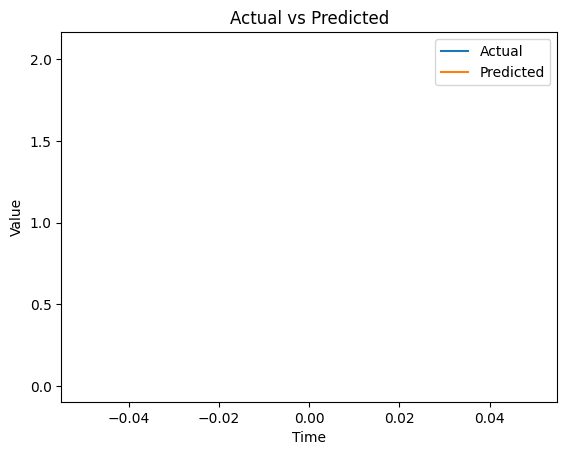

In [ ]:
# import torch
# import torch.nn as nn
# import numpy as np
# import matplotlib.pyplot as plt

# # Generate sample data
# np.random.seed(0)
# data = details[5] # Sample time series data

# # Define function to create lagged sequences
# def create_lagged_sequence(data, lag):
#     X, y = [], []
#     for i in range(len(data)-lag):
#         X.append(data[i:(i+lag)])
#         y.append(data[i+lag])
#     return np.array(X), np.array(y)

# # Create lagged sequences
# lag = 5
# X, y = create_lagged_sequence(data, lag)

# # Split data into train and test sets
# split_idx = int(0.7 * len(X))
# X_train, y_train = X[:split_idx], y[:split_idx]
# X_test, y_test = X[split_idx:], y[split_idx:]

# # Convert data to PyTorch tensors
# X_train = torch.Tensor(X_train)
# y_train = torch.Tensor(y_train)
# X_test = torch.Tensor(X_test)
# y_test = torch.Tensor(y_test)

# # Define neural network
# class Net(nn.Module):
#     def __init__(self):
#         super(Net, self).__init__()
#         self.fc1 = nn.Linear(lag, 1)
#         self.sigmoid = nn.Sigmoid()

#     def forward(self, x):
#         x = self.fc1(x)
#         x = self.sigmoid(x)
#         return x

# # Initialize the network
# net = Net()

# # Define loss function and optimizer
# criterion = nn.MSELoss()
# optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

# # Train the network
# epochs = 1000
# for epoch in range(epochs):
#     optimizer.zero_grad()
#     outputs = net(X_train)
#     loss = criterion(outputs, y_train.view(-1, 1))
#     loss.backward()
#     optimizer.step()
#     if (epoch+1) % 100 == 0:
#         print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# # Evaluate the trained network
# net.eval()
# predicted = net(X_test).detach().numpy()

# # Plot actual vs predicted values
# plt.plot(y_test, label='Actual')
# plt.plot(predicted, label='Predicted')
# plt.xlabel('Time')
# plt.ylabel('Value')
# plt.title('Actual vs Predicted')
# plt.legend()
# plt.show()
